# **I. Perkenalan**

```
=======================================================================================================================================
Non-Graded Challenge 1 Phase 1

Nama  : Achmed Alridho Zulkarnaen
Batch : RMT-037

File ipynb ini berisikan pembuatan machine learning model yang dapat memprediksi insurance cost seseorang.
=======================================================================================================================================
```

# **II. Identifikasi Masalah**

### LATAR BELAKANG

Sebagai Data Scientist yang baru tiba di Amerika Serikat, saya ingin memprediksi biaya asuransi kesehatan yang bervariasi berdasarkan faktor-faktor seperti usia, riwayat kesehatan, dan gaya hidup. Dengan menggunakan Machine Learning, saya berupaya mengembangkan model untuk memberikan estimasi premi secara akurat dan memahami faktor-faktor yang memengaruhinya.

### Problem Statement (SMART)

Saya ingin memproyeksikan biaya asuransi kesehatan untuk individu di Amerika Serikat berdasarkan berbagai faktor relevan. Tujuan dari proyek ini adalah untuk memberikan estimasi biaya yang lebih tepat menggunakan model Linear Regression.

* Specific: Memproyeksikan biaya premi asuransi kesehatan dengan mempertimbangkan variabel seperti usia, jenis kelamin, BMI, dan status merokok.

* Measurable: Dapat diukur dengan membandingkan hasil prediksi premi asuransi dari model dengan data aktual.

* Achievable: Dapat dicapai dengan menggunakan data insurance yang ada dan menerapkan model Machine Learning Linear Regression untuk menghasilkan estimasi.

* Relevant: Proyek ini relevan untuk membantu seseorang dalam memperkirakan biaya asuransi kesehatan, yang dapat membantu mereka merencanakan anggaran dan membuat keputusan yang tepat mengenai pilihan asuransi.

* Time-Bound: Dapat diselesaikan dan memberikan hasil dalam jangka waktu satu minggu.

### Penjabaran Masalah:

* Faktor apa saja yang memiliki pengaruh terbesar terhadap premi asuransi kesehatan?
* Bagaimana hubungan antara usia, jenis kelamin, BMI, dan status merokok dengan premi asuransi?
* Seberapa akurat model Linear Regression dalam memprediksi biaya premi?
* Dapatkah estimasi biaya ini membantu individu dalam memilih paket asuransi yang tepat?
* Bagaimana prediksi ini dapat memberikan wawasan yang lebih baik mengenai pengelolaan kesehatan?



# **III. Import Library**

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import sklearn

from sklearn.preprocessing import OneHotEncoder

#Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

# **IV. Data Loading**

In [2]:
df_ori = pd.read_csv('insurance.csv')
df = df_ori.copy()
df_ori.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Seluruh data type sudah benar

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* Tidak terlihat ada missing value

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Dilihat dari bmi rata-rata menunjukan 30.66 yang artinya rata-rata orang di amerika obesitas.
* Rata-rata umur 39 artinya kebanyakan pengguna asuransi memiliki umur paruh baya.
* Rata-rata memiliki 1 anak.
* Rata-rata membayar 13.270,42 USD, tetapi jika di lihat memiliki std yang tinggi, hal ini mengindikasikan adanya outlier pada column charges yang harus di handle berdasarkan penilaian selanjutnya.

# **V. Exploratory Data Analysis (EDA)**

In [6]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
# Melihat distibusi column region
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
# Melihat distibusi column smoker
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
# Melihat distibusi column children
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

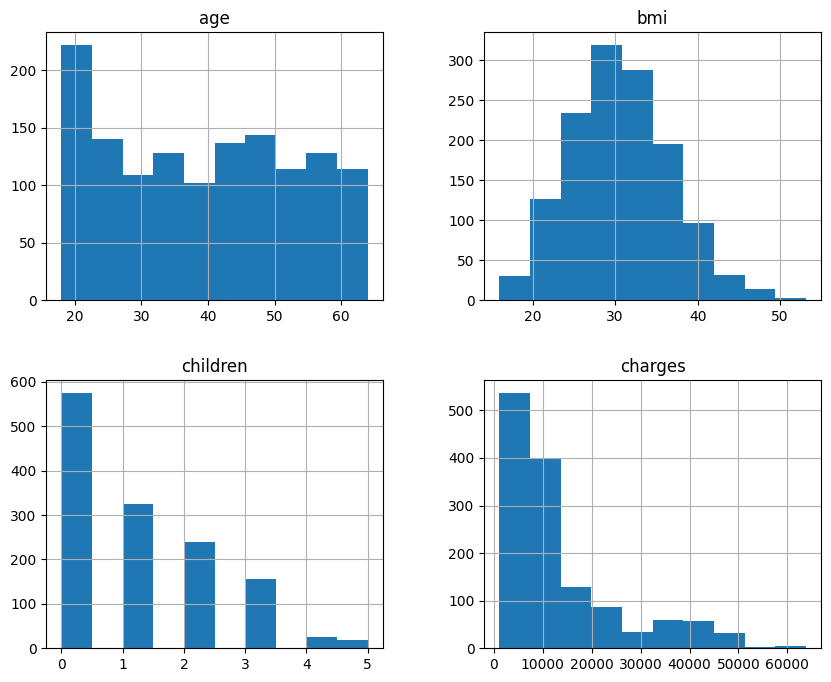

In [10]:
# Visualizing Data Distribution
# Histogram to check distribution of numerical features
df.hist(figsize=(10, 8))
plt.show()

Charges memiliki distribusi yang positive skewed, menunjukkan bahwa ada lebih banyak individu yang membayar charges lebih rendah, sedangkan hanya sebagian kecil yang membayar charges tinggi.

BMI terdistribusi cenderung normal dengan indikasi adanya outlier.

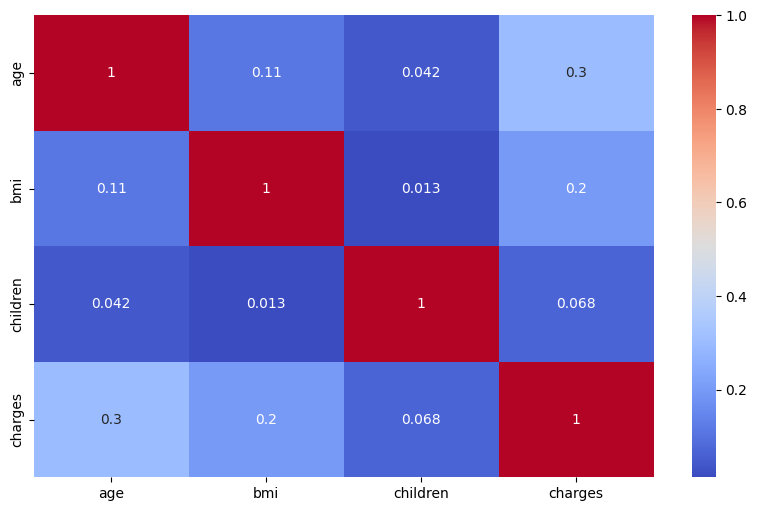

In [11]:
# Correlation Analysis
# Heatmap to visualize correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Dari heatmap kita dapat menyimpulkan bahwa:

* Korelasi positif yang cukup signifikan antara age dan charges. Ini berarti semakin tua seseorang, kemungkinan besar charge asuransinya akan lebih tinggi.

* BMI juga memiliki korelasi positif dengan charges, meskipun tidak sekuat age. Ini menunjukkan bahwa individu dengan BMI lebih tinggi cenderung membayar charge lebih besar.

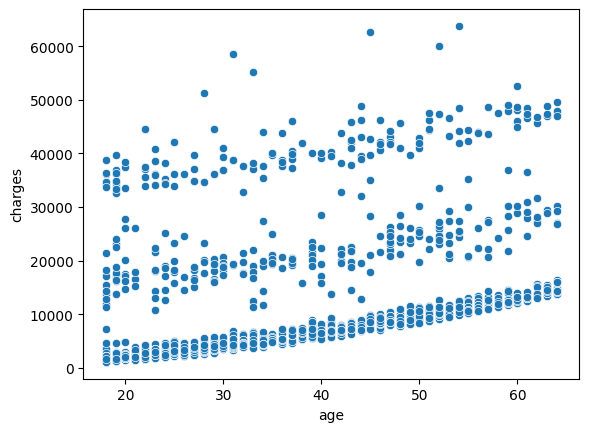

In [12]:
# Hubungan Antar age dan charges
sns.scatterplot(x='age', y='charges', data=df)
plt.show()

`Age dan charges` menunjukkan tren naik, yang mengindikasikan hubungan positif antara usia dan biaya asuransi.

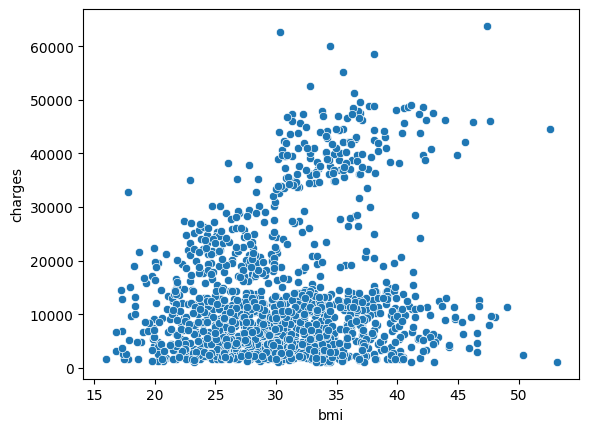

In [13]:
# Hubungan Antar bmi dan charges
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

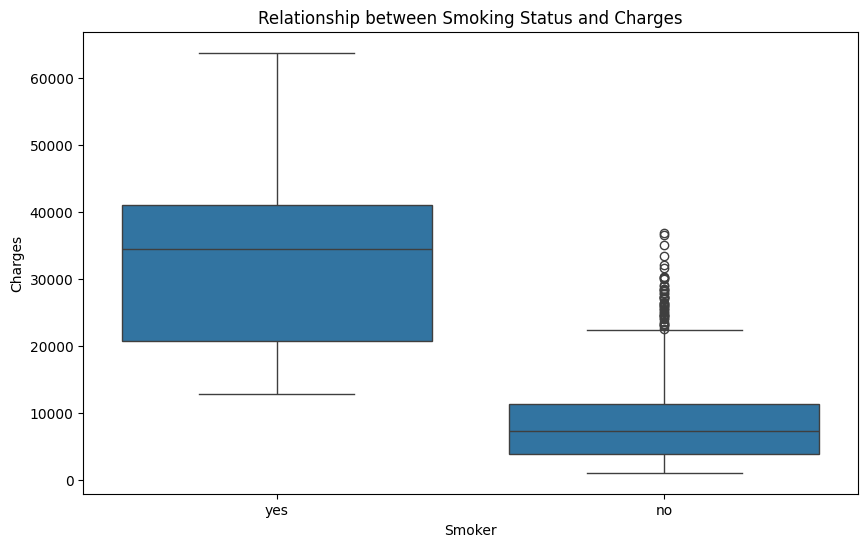

In [14]:
# Hubungan Antar smokeing status dan charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoking Status and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Boxplot menunjukkan perbedaan yang sangat jelas antara perokok dan bukan perokok dalam charges. Perokok membayar charges yang jauh lebih tinggi dibandingkan dengan non-perokok.

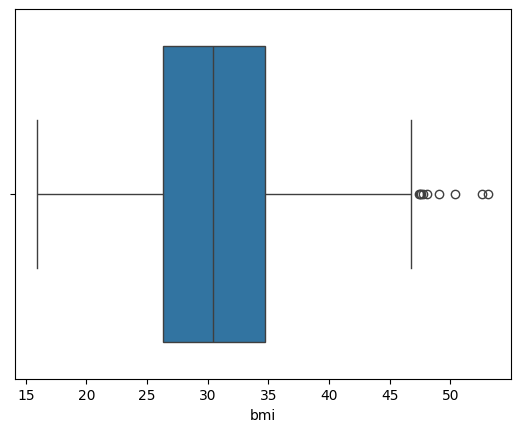

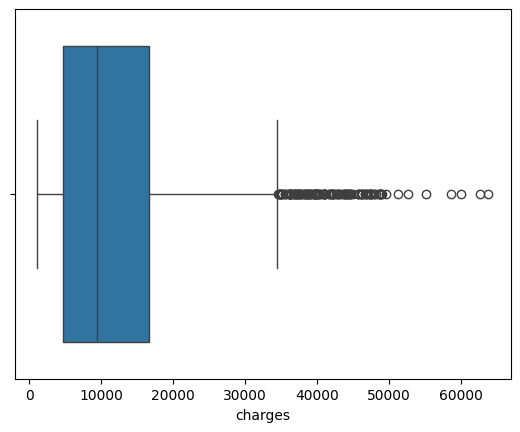

In [15]:
# Mengetahui outlier pada bmi
sns.boxplot(x=df['bmi'])
plt.show()
# Mengetahui outlier pada charges
sns.boxplot(x=df['charges'])
plt.show()

Dari boxplot untuk bmi dan charges, terlihat adanya nilai-nilai yang mungkin merupakan outlier, terutama pada charges. Outlier tersebut bisa mengindikasikan individu dengan kondisi kesehatan tertentu atau charges yang sangat tinggi yang harus dianalisis lebih lanjut.

#### Kesimpulan EDA:
Faktor utama yang mempengaruhi biaya premi asuransi adalah status merokok dan usia. Perokok cenderung membayar charges lebih tinggi, dan semakin bertambah usia, biaya juga meningkat. Meskipun BMI juga memengaruhi biaya, dampaknya tidak sebesar status merokok dan usia, tetapi tetap ada kecenderungan charges yang lebih tinggi bagi individu dengan BMI lebih tinggi. Karena distribusi charges miring, transformasi data seperti log transformation mungkin diperlukan untuk meningkatkan performa model.

# **VI. Feature Engineering**

#### Splitting Dataset X and y

In [16]:
# Splitting dataset into features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

#### Splitting Dataset Train-Set and Test-set

In [17]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (1070, 6)
Test Size:  (268, 6)


#### Split Numerical Columns and Categorical Columns

In [18]:
# Splitting numerical and categorical columns
num_columns = X_train.select_dtypes(include= np.number).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

# Creating separate DataFrames for numerical and categorical columns
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Displaying the results
print(f"Numerical columns: {list(num_columns)}")
print(f"Categorical columns: {list(cat_columns)}")

Numerical columns: ['age', 'bmi', 'children']
Categorical columns: ['sex', 'smoker', 'region']


In [19]:
X_train_num

,age,bmi,children
737,26,23.700,2
369,18,30.400,3
284,52,31.200,0
1302,25,20.800,1
958,43,34.960,1
...,...,...,...
1330,57,25.740,2
1016,19,24.605,1
165,47,28.215,4
7,37,27.740,3


#### Outliers Handling

Menggunakan IQR Method karena distibusi charges yang cenderung highly skewed secara positif.

In [32]:
# Calculate IQR for numerical features in X_train
Q1 = X_train[num_columns].quantile(0.25)
Q3 = X_train[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper boundaries for each numerical column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers for each numerical column

# Flag outliers for 'age'
outliers_age = np.where(X_train['age'] > upper_bound['age'], True,
                        np.where(X_train['age'] < lower_bound['age'], True, False))

# Flag outliers for 'bmi'
outliers_bmi = np.where(X_train['bmi'] > upper_bound['bmi'], True,
                        np.where(X_train['bmi'] < lower_bound['bmi'], True, False))

# Flag outliers for 'children'
outliers_children = np.where(X_train['children'] > upper_bound['children'], True,
                             np.where(X_train['children'] < lower_bound['children'], True, False))

# Trimming the dataset to remove all rows with any outliers in numerical columns
outliers_combined = outliers_age | outliers_bmi | outliers_children
X_train_numtrimmed = X_train_num.loc[~outliers_combined]
X_train_cattrimmed = X_train_cat.loc[~outliers_combined]
y_train_trimmed = y_train.loc[~outliers_combined]

#### Missing Value Handling

In [36]:
# Check keberadaan missing values pada X_train and X_test
print("Missing values in X_train_num:")
print(X_train_numtrimmed.isnull().sum())

print("Missing values in X_train_cat:")
print(X_train_cattrimmed.isnull().sum())

print("\nMissing values in X_test:")
print(X_test.isnull().sum())

Missing values in X_train_num:
age         0
bmi         0
children    0
dtype: int64
Missing values in X_train_cat:
sex       0
smoker    0
region    0
dtype: int64

Missing values in X_test:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


* Tidak ditemukan keberadaan missing values pada data

#### Feature Selection

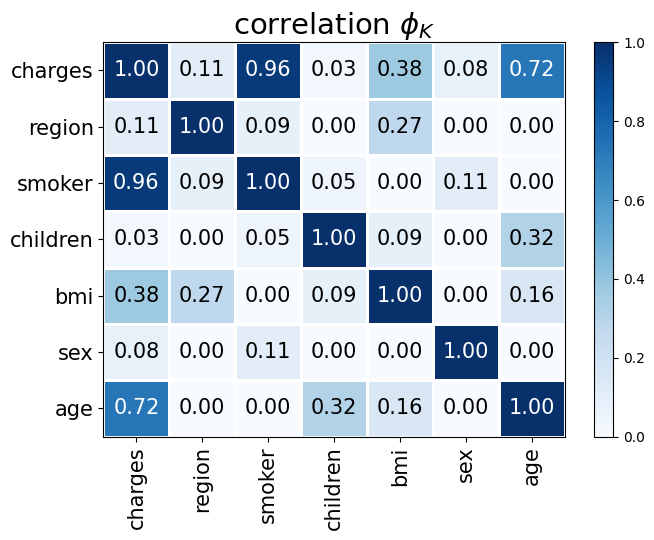

In [22]:
data_types = {'age': 'interval',
             'sex':'categorical',
             'bmi':'interval',
             'children':'interval',
             'smoker':'categorical',
             'region':'categorical',
             'charges':'interval'}
interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))
plt.tight_layout()

In [ ]:
#Drop column 'Name'
X_train_numtrimmed.drop('children', axis = 1, inplace = True)
X_train_cattrimmed.drop('region', axis = 1, inplace = True)
X_train_cattrimmed.drop('sex', axis = 1, inplace = True)

X_test_cat.drop('region', axis = 1, inplace = True)
X_test_cat.drop('sex', axis = 1, inplace = True)
X_test_num.drop('children', axis = 1, inplace = True)

#### Handling Cardinality

In [44]:
X_train_cattrimmed

,smoker
737,no
369,no
284,no
1302,no
958,yes
...,...
1330,no
1016,no
165,no
7,no


Hanya 1 column yang memiliki 2 kategori saja jadi tidak ada handling cardinality

#### Feature Scaling

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train_numtrimmed)

X_train_numtrimmed_scaled = scaler.transform(X_train_numtrimmed)
X_test_numtrimmed_scaled = scaler.transform(X_test_num)

X_train_numtrimmed_scaled

array([[0.17391304, 0.2531894 ],
       [0.        , 0.47235852],
       [0.73913043, 0.49852797],
       ...,
       [0.63043478, 0.40088322],
       [0.41304348, 0.38534511],
       [0.13043478, 0.23716061]])

#### Feature Encoding

In [77]:
# OneHotEncoder setup for 'smoker' column
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fitting and transforming 'smoker' column for X_train
smoker_encoded_train = encoder.fit_transform(X_train_cattrimmed[['smoker']])
smoker_encoded_test = encoder.transform(X_test[['smoker']])


In [78]:
smoker_encoded_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

#### Concate between Numeric Columns and Categorical Columns

In [82]:
#Concate Columns

X_train_final = np.concatenate([X_train_numtrimmed_scaled, smoker_encoded_train], axis = 1)
X_test_final = np.concatenate([X_test_numtrimmed_scaled, smoker_encoded_test], axis = 1)

X_train_final.shape

(1062, 3)

In [84]:
X_train_final_df = pd.DataFrame(X_train_final, columns = ['age','bmi','smoker'])
X_train_final_df

,age,bmi,smoker
0,0.173913,0.253189,0.0
1,0.000000,0.472359,0.0
2,0.739130,0.498528,0.0
3,0.152174,0.158325,0.0
4,0.543478,0.621524,1.0
...,...,...,...
1057,0.847826,0.319921,0.0
1058,0.021739,0.282794,0.0
1059,0.630435,0.400883,0.0
1060,0.413043,0.385345,0.0


In [86]:
X_test_final_df = pd.DataFrame(X_test_final, columns = ['age','bmi','smoker'])
X_test_final_df

,age,bmi,smoker
0,0.152174,0.589794,0.0
1,0.000000,0.726529,1.0
2,0.500000,0.691528,0.0
3,0.673913,0.683350,0.0
4,0.130435,0.149166,1.0
...,...,...,...
263,0.434783,0.168793,0.0
264,0.913043,0.416748,0.0
265,0.695652,0.363592,0.0
266,0.130435,0.251717,0.0


# **VII. Model Definition**

In [87]:
#Training using Linear Regression
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_final, y_train_trimmed)

LinearRegression()

# **VIII. Model Evaluation**

In [88]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 2859.56826115,  2916.60166309, 11854.32429013, ...,
        9640.80289519,  6936.89348349,  2194.92146809])

In [89]:
#Model Evaluation using MAE
from sklearn.metrics import mean_absolute_error

print('Error - train set: ', mean_absolute_error(y_train_trimmed, y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, y_pred_test))

Error - train set:  4140.708193471238
Error - Test Set:  4328.382071808474


# **IX. Model Saving**

In [93]:
#Save the Files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(['age','bmi'], file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(['smoker'], file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)